In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [55]:
df = pd.read_csv("D:\Projects\Dataset\AQI_prediction_dataset.csv")

In [56]:
df_x = pd.read_csv(r"D:\Projects\Dataset\train_x.csv")
df_y = pd.read_csv(r"D:\Projects\Dataset\train_y.csv")
df_x1 = pd.read_csv(r"D:\Projects\Dataset\test_x.csv")
df_y1 = pd.read_csv(r"D:\Projects\Dataset\test_y.csv")

In [57]:
df_x.head(5)

,Date,PM2.5,PM10,NO2,NOx,CO,SO2,O3,temp,max_temp,min_temp,humid,visible,wind
0,01-01-2016,56.40,95.08,51.73,34.31,0.69,7.44,55.96,20.1,28.4,15.7,54.0,6.0,3.0
1,02-01-2016,53.69,93.92,73.09,54.77,0.76,8.67,34.06,20.8,28.3,12.9,45.0,6.3,1.1
2,03-01-2016,62.35,99.34,77.77,55.60,0.96,9.10,47.62,21.4,29.0,13.7,45.0,6.3,0.4
3,04-01-2016,64.96,104.62,77.07,50.81,0.89,8.87,50.62,21.5,29.0,15.2,47.0,6.9,2.2
4,05-01-2016,70.15,105.12,79.43,56.05,0.85,9.41,36.94,20.9,28.4,14.7,51.0,6.3,1.1


In [58]:
df_x1.head(5)

,Date,PM2.5,PM10,NO2,NOx,CO,SO2,O3,temp,max_temp,min_temp,humid,visible,wind
0,01-01-2020,30.71,70.80,27.31,26.74,1.07,8.56,37.39,22.0,27.2,19.2,75,6.9,3.3
1,02-01-2020,25.78,62.73,28.05,30.18,1.16,7.52,33.11,22.2,26.0,19.4,77,5.5,2.0
2,03-01-2020,29.66,69.62,26.26,26.92,0.99,6.40,32.98,23.4,28.4,19.4,68,6.9,3.5
3,04-01-2020,52.62,106.81,31.56,41.89,1.39,6.94,37.35,23.6,30.5,19.0,63,6.3,1.3
4,05-01-2020,52.64,97.94,29.10,29.52,1.01,7.01,45.10,24.2,30.5,20.4,63,6.3,1.3


In [59]:
df_y.head(5)

,Date,AQI
0,01-01-2016,101
1,02-01-2016,92
2,03-01-2016,108
3,04-01-2016,109
4,05-01-2016,114


In [60]:
df_y1.head(5)

,Date,AQI
0,01-01-2020,82
1,02-01-2020,81
2,03-01-2020,85
3,04-01-2020,95
4,05-01-2020,118


In [61]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1441 non-null   object 
 1   PM2.5     1441 non-null   float64
 2   PM10      1441 non-null   float64
 3   NO2       1441 non-null   float64
 4   NOx       1441 non-null   float64
 5   CO        1441 non-null   float64
 6   SO2       1441 non-null   float64
 7   O3        1441 non-null   float64
 8   temp      1441 non-null   float64
 9   max_temp  1441 non-null   float64
 10  min_temp  1441 non-null   float64
 11  humid     1441 non-null   float64
 12  visible   1441 non-null   float64
 13  wind      1441 non-null   float64
dtypes: float64(13), object(1)
memory usage: 157.7+ KB


In [62]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1441 non-null   object
 1   AQI     1441 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.6+ KB


In [63]:
df_x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      182 non-null    object 
 1   PM2.5     182 non-null    float64
 2   PM10      182 non-null    float64
 3   NO2       182 non-null    float64
 4   NOx       182 non-null    float64
 5   CO        182 non-null    float64
 6   SO2       182 non-null    float64
 7   O3        182 non-null    float64
 8   temp      182 non-null    float64
 9   max_temp  182 non-null    float64
 10  min_temp  182 non-null    float64
 11  humid     182 non-null    int64  
 12  visible   182 non-null    float64
 13  wind      182 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 20.0+ KB


In [64]:
df_y1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    182 non-null    object
 1   AQI     182 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [65]:
df_x["Date"] = pd.to_datetime(df_x["Date"])

In [66]:
df_x1["Date"] = pd.to_datetime(df_x1["Date"])

In [67]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1441 non-null   datetime64[ns]
 1   PM2.5     1441 non-null   float64       
 2   PM10      1441 non-null   float64       
 3   NO2       1441 non-null   float64       
 4   NOx       1441 non-null   float64       
 5   CO        1441 non-null   float64       
 6   SO2       1441 non-null   float64       
 7   O3        1441 non-null   float64       
 8   temp      1441 non-null   float64       
 9   max_temp  1441 non-null   float64       
 10  min_temp  1441 non-null   float64       
 11  humid     1441 non-null   float64       
 12  visible   1441 non-null   float64       
 13  wind      1441 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 157.7 KB


In [68]:
df_x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      182 non-null    datetime64[ns]
 1   PM2.5     182 non-null    float64       
 2   PM10      182 non-null    float64       
 3   NO2       182 non-null    float64       
 4   NOx       182 non-null    float64       
 5   CO        182 non-null    float64       
 6   SO2       182 non-null    float64       
 7   O3        182 non-null    float64       
 8   temp      182 non-null    float64       
 9   max_temp  182 non-null    float64       
 10  min_temp  182 non-null    float64       
 11  humid     182 non-null    int64         
 12  visible   182 non-null    float64       
 13  wind      182 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 20.0 KB


<AxesSubplot:>

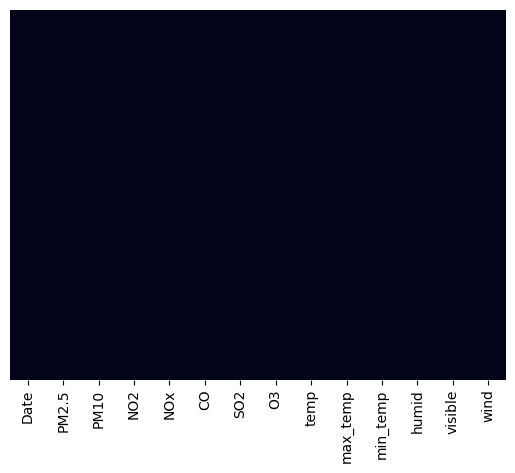

In [69]:
sns.heatmap(df_x.isnull(),cbar=False, yticklabels=False)

<AxesSubplot:>

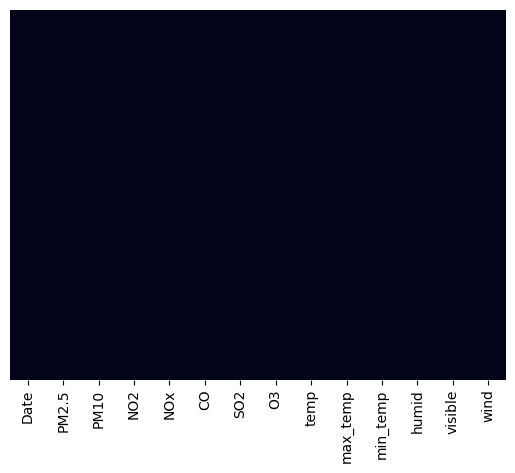

In [70]:
sns.heatmap(df_x1.isnull(),cbar=False, yticklabels=False)

In [71]:
x_train = df_x.drop(['Date'], axis = 1)
y_train = df_y["AQI"]
x_test = df_x1.drop(['Date'], axis = 1)
y_test = df_y1["AQI"]

In [72]:
x_train.head(5)

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,temp,max_temp,min_temp,humid,visible,wind
0,56.40,95.08,51.73,34.31,0.69,7.44,55.96,20.1,28.4,15.7,54.0,6.0,3.0
1,53.69,93.92,73.09,54.77,0.76,8.67,34.06,20.8,28.3,12.9,45.0,6.3,1.1
2,62.35,99.34,77.77,55.60,0.96,9.10,47.62,21.4,29.0,13.7,45.0,6.3,0.4
3,64.96,104.62,77.07,50.81,0.89,8.87,50.62,21.5,29.0,15.2,47.0,6.9,2.2
4,70.15,105.12,79.43,56.05,0.85,9.41,36.94,20.9,28.4,14.7,51.0,6.3,1.1


In [73]:
x_test.head(5)

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,temp,max_temp,min_temp,humid,visible,wind
0,30.71,70.80,27.31,26.74,1.07,8.56,37.39,22.0,27.2,19.2,75,6.9,3.3
1,25.78,62.73,28.05,30.18,1.16,7.52,33.11,22.2,26.0,19.4,77,5.5,2.0
2,29.66,69.62,26.26,26.92,0.99,6.40,32.98,23.4,28.4,19.4,68,6.9,3.5
3,52.62,106.81,31.56,41.89,1.39,6.94,37.35,23.6,30.5,19.0,63,6.3,1.3
4,52.64,97.94,29.10,29.52,1.01,7.01,45.10,24.2,30.5,20.4,63,6.3,1.3


In [74]:
y_train.head(5)

0    101
1     92
2    108
3    109
4    114
Name: AQI, dtype: int64

In [75]:
y_test.head(5)

0     82
1     81
2     85
3     95
4    118
Name: AQI, dtype: int64

In [76]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [77]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [98]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
sd.fit(x_train)

StandardScaler()

In [79]:
import pickle
pickle.dump(sd,open('sd.pkl','wb'))

In [80]:
y_test[:5]

array([[-0.27610501],
       [-0.30227705],
       [-0.1975889 ],
       [ 0.06413148],
       [ 0.66608835]])

In [81]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [82]:
y_prediction =  regressor.predict(x_test)
y_prediction

array([[-0.15443872],
       [-0.16287207],
       [-0.26053511],
       [ 0.61807635],
       [ 0.48828553],
       [-0.43076054],
       [-0.37669591],
       [ 0.02603702],
       [ 0.22448707],
       [ 0.14309186],
       [-0.20335888],
       [ 0.02414246],
       [ 0.44479284],
       [ 0.74401932],
       [ 0.33356591],
       [ 0.55856494],
       [ 0.29531922],
       [-0.43012982],
       [-0.45628081],
       [ 0.04499704],
       [ 0.01974288],
       [-0.1935567 ],
       [-0.0395035 ],
       [ 0.04772714],
       [ 0.25804138],
       [ 0.32674537],
       [ 0.42794233],
       [ 0.65367363],
       [ 0.63468737],
       [ 0.51193541],
       [ 0.57074395],
       [ 0.55689876],
       [-0.08553157],
       [-0.0932362 ],
       [-0.21657012],
       [-0.0745152 ],
       [ 0.38364894],
       [ 0.46313606],
       [ 0.34185557],
       [ 0.49656187],
       [ 0.02651244],
       [-0.12468637],
       [-0.19617919],
       [ 0.09628079],
       [ 0.82581985],
       [ 1

In [83]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.8470203628720603
mean_sqrd_error is  0.038965774481801455
Root mean squared error of is 0.197397503737513
Mean Absolute error is 0.1575596526941773


In [84]:
y_test = sc_y.inverse_transform(y_test)
y_test[:5]

array([[ 82.],
       [ 81.],
       [ 85.],
       [ 95.],
       [118.]])

In [85]:
y_prediction = sc_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 86.6487127 ],
       [ 86.32648544],
       [ 82.59490571],
       [116.16552321],
       [111.20638229]])

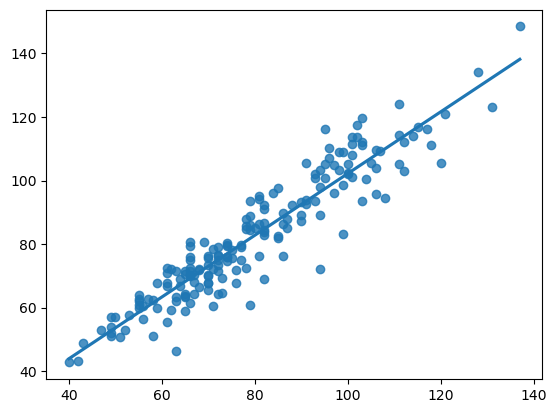

In [86]:
# importing libraries
import seaborn as sns
  
# use regplot
sns.regplot(x = y_test,
            y = y_prediction, 
            ci = None,
            data = df)
plt.savefig('MLR_Scatter.jpg')

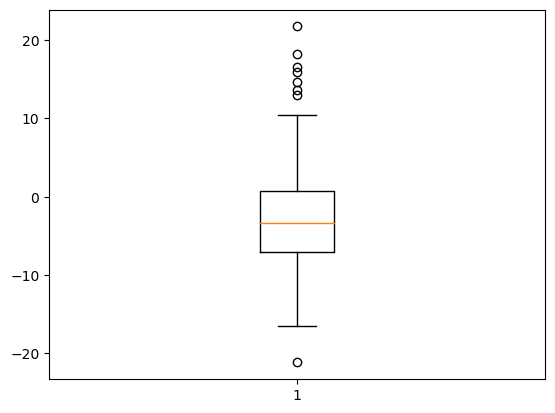

In [87]:
error = y_test - y_prediction
plt.boxplot(error)
plt.savefig('MLR_BoxPlot.jpg')

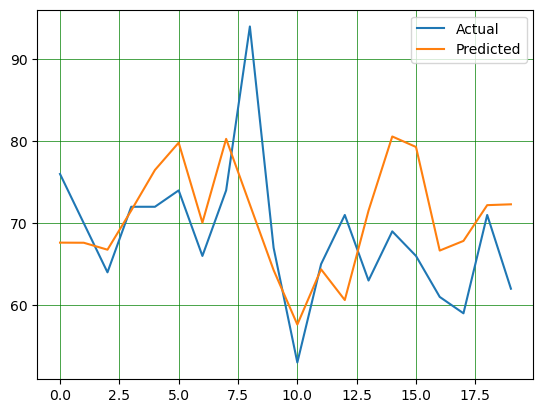

In [88]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('MLR_ActualvsPredicted.jpg')
plt.show()

In [89]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100

In [90]:
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,82.0,86.648713,-4.648713,5.669162
1,81.0,86.326485,-5.326485,6.575908
2,85.0,82.594906,2.405094,2.829523
3,95.0,116.165523,-21.165523,22.279498
4,118.0,111.206382,6.793618,5.757303
5,81.0,76.090810,4.909190,6.060728
6,75.0,78.156551,-3.156551,4.208734
7,93.0,93.544459,-0.544459,0.585440
8,101.0,101.126981,-0.126981,0.125724
9,94.0,98.016975,-4.016975,4.273377


In [91]:
import pickle

In [92]:
pickle.dump(regressor,open('MLR.pkl','wb'))

In [93]:
pickle_model = pickle.load(open('MLR.pkl','rb'))

In [94]:
data = {
		"PM2.5": 56.4,
		"PM10": 95.08,
		"NO2": 51.71,
		"NOx": 34.31,
		"CO": 0.69,
		"SO2": 7.44,
		"O3": 55.96,
		"temp": 20.1,
		"max_temp": 28.4,
		"min_temp": 15.7,
		"humid": 54.0,
		"visible": 6.0,
		"wind": 3.0
	}


In [97]:
print(sc_x.transform(np.array(list(data.values())).reshape(1,-1)))

[[ 0.70123094  0.22341448  1.62129981  0.84592452 -0.18026357  1.00825383
   1.19442119 -1.81657462 -0.67018747 -1.79413706 -0.63751945 -0.95288902
  -0.58144294]]


In [96]:
pickle_model.predict(sc_x.transform(np.array(list(data.values())).reshape(1,-1)))

array([[0.63699708]])